In [2]:
from google.colab import drive
drive.mount('/content/drive/')

# Notre repertoire de travail
%cd drive/MyDrive/coursiap/

Mounted at /content/drive/
/content/drive/MyDrive/coursiap


In [3]:
%cd Apprentissage_Artificiel_INF4248/

/content/drive/MyDrive/coursiap/Apprentissage_Artificiel_INF4248


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#**Description du jeu de Données**

**Nom :**    Churn_Modeling                                                                  
**Extension** : .csv

**Fichier :** Churn_Modeling.csv

**source :** https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling

**A propos :** Cet ensemble de données contient des détails sur les clients d'une banque et la variable cible est une variable binaire reflétant le fait que le client a quitté la banque (fermé son compte) ou qu'il continue d'être client.

**Dataset Shape :** (10000, 14)

**Nombre de colonnes :** 13 features et 1 target

**Nombre de lignes :** 10000

###Description de chaque feature



1.   **CustomerId :** Identifiant unique pour l'identification des clients de la banque (type = int)
2.   **Surname :** Nom du client (type = string)

1.   **CreditScore :** Valeur de crédit du client (type = int)
2.   **Geography :** Pays d'origine du client (type = string)

1.   **Gender :** Sexe du client :Male ou Female(type = string)
2.   **Age :** Age du client (type = int)

1.   **Tenure :** Nombre d'années depuis lesquelles le clinet est avec la banque (type = int)
2.   **Balance :** Solde Bancaire du client (type = decimal)

1.   **NumOfProducts :** Nombre de produits bancaires que le client utilise (type = int)
2.   **HasCrCard :** Indicateur binaire indiquant si le client détient ou non une carte de crédit auprès de la banque (0/1 : type = int)

1.   **IsActiveMenber :** Indicateur binaire indiquant si le client est un membre actif de la banque ou non (0/1 : type = int)
2.   **EstimatedSalary :** Salaire estimé du client en Dollars (type = decimal)

1.   **Exited (target) :** Drapeau binaire 1 si le client a clôturé le compte auprès de la banque et 0 si le client est retenu (type = int)






















In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## suppression des variables inutiles ##

In [ ]:

X = df.iloc[:, 3:13].values
y = df.iloc[:, 13].values

display(X)
display(y)

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

array([1, 0, 1, ..., 1, 1, 0])

## Encodage de données catégorielles.. ##

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()

X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_X_2 = LabelEncoder()

X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

onehotencorder = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [1])],remainder='passthrough')

X = onehotencorder.fit_transform(X)

X = X[:, 1:]
X = pd.DataFrame(X)
X



,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


# Modelisation #

*Séparation des données en données de test et données d'entrainement*
80% / 20%  (train & test)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_test

,0,1,2,3,4,5,6,7,8,9,10
9394,1.0,0.0,597,0,35,8,131101.04,1,1,1,192852.67
898,0.0,0.0,523,0,40,2,102967.41,1,1,0,128702.1
2398,0.0,1.0,706,0,42,8,95386.82,1,1,1,75732.25
5906,0.0,0.0,788,1,32,4,112079.58,1,0,0,89368.59
2343,1.0,0.0,706,1,38,5,163034.82,2,1,1,135662.17
...,...,...,...,...,...,...,...,...,...,...,...
1037,0.0,0.0,625,0,24,1,0.0,2,1,1,180969.55
2899,0.0,0.0,586,0,35,7,0.0,2,1,0,70760.69
9549,0.0,1.0,578,1,36,1,157267.95,2,1,0,141533.19
2740,1.0,0.0,650,1,34,4,142393.11,1,1,1,11276.48


# normalisation #

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[ 1.75486502, -0.57369368, -0.55204276, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-0.5698444 , -0.57369368, -1.31490297, ...,  0.64259497,
        -1.03227043,  0.49587037],
       [-0.5698444 ,  1.74309049,  0.57162971, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.5698444 ,  1.74309049, -0.74791227, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [ 1.75486502, -0.57369368, -0.00566991, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [ 1.75486502, -0.57369368, -0.79945688, ...,  0.64259497,
        -1.03227043,  1.61255917]])

# **Reseau de Neuronnes** #

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()


Choix du nombre de neurones de la couche caché

(nbre_features + 1) / 2

In [ ]:
# première couche cachée
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# deuxième couche cachée
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
# couche de sortie
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [ ]:
# Compilation avec l'Optimiseur ADAM 
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Copy model ::::RMS PROP
model_RMS= keras.models.clone_model(classifier)
#model_copy.build((None, 10)) # replace 10 with number of variables in input layer
model_RMS.compile(optimizer='RMSprop', loss='binary_crossentropy')
#model_copy.set_weights(model.get_weights())

# Copy model ::::ADAGRAD
model_ADAGRAD= keras.models.clone_model(classifier)
#model_copy.build((None, 10)) # replace 10 with number of variables in input layer
model_ADAGRAD.compile(optimizer='Adagrad', loss='binary_crossentropy')
#model_copy.set_weights(model.get_weights())


# Copy model ::::ADADELTA
model= keras.models.clone_model(classifier)
#model_copy.build((None, 10)) # replace 10 with number of variables in input layer
model_ADT.compile(optimizer='Adadelta', loss='binary_crossentropy')
#model_copy.set_weights(model.get_weights())

# Copy model ::::ADAMAX
model_ADMAX= keras.models.clone_model(classifier)
#model_copy.build((None, 10)) # replace 10 with number of variables in input layer
model_ADMAX.compile(optimizer='Adamax', loss='binary_crossentropy')
#model_copy.set_weights(model.get_weights())

# Copy model ::::NADAM
model_NADAM= keras.models.clone_model(classifier)
#model_copy.build((None, 10)) # replace 10 with number of variables in input layer
model_NADAM.compile(optimizer='Nadam', loss='binary_crossentropy')
#model_copy.set_weights(model.get_weights())

# Copy model :::: SGD
model_SGD= keras.models.clone_model(classifier)
#model_copy.build((None, 10)) # replace 10 with number of variables in input layer
model_SGD.compile(optimizer='SGD', loss='binary_crossentropy')
#model_copy.set_weights(model.get_weights())

# entrainement #

In [ ]:
# Compiling the ANN

training_RMS = model_RMS.fit(X_train, y_train, batch_size = 10, epochs = 100)

training_ADAGRAD = model_ADAGRAD.fit(X_train, y_train, batch_size = 10, epochs = 100)

training_ADT = model_ADT.fit(X_train, y_train, batch_size = 10, epochs = 100)

training_ADM = model_ADMAX.fit(X_train, y_train, batch_size = 10, epochs = 100)

training_NADAM = model_NADAM.fit(X_train, y_train, batch_size = 10, epochs = 100)

training_SGD = model_SGD.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 2s 1ms/step - loss: 0.5320
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4353
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4290
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4245
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4212
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4184
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4164
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4145
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4132
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4115
Epoch 11/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4105
Epoch 12/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4090
Epoch 13/100


In [ ]:
training_ADAM = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)



Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4818 - accuracy: 0.7954
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4264 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4205 - accuracy: 0.8048
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4171 - accuracy: 0.8250
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4149 - accuracy: 0.8280
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4134 - accuracy: 0.8309
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4117 - accuracy: 0.8310
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4109 - accuracy: 0.8332
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4092 - accuracy: 0.8328
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4088 - accura

In [ ]:
model_ADAGRAD.save('model_ADAGRAD.h5')

model_RMS.save('model_RMS.h5')

model_ADT.save('model_ADT.h5')

model_ADMAX.save('model_ADAMAX.h5')

model_NADAM.save('model_NADAM.h5')

model_SGD.save('model_SGD.h5')

model.save('model_ADAM.h5')

# prédictions et évaluation du modèle #

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1549   46]
 [ 264  141]]


In [ ]:
classifier.save('churn.h5')

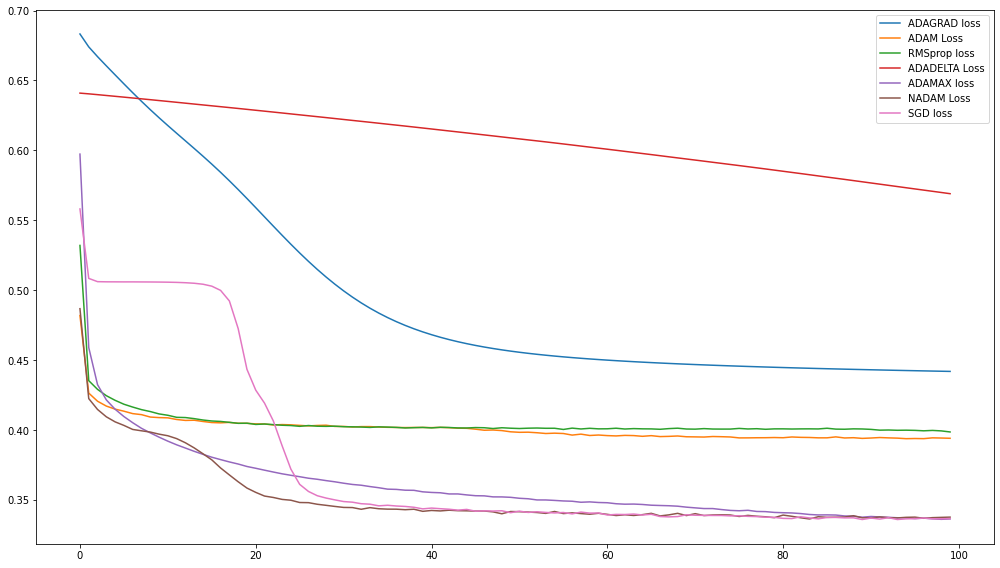

In [ ]:
historique_ADAM = pd.DataFrame(training_ADAM.history)
historique_ADAM['epoque'] = training_ADAM.epoch

historique_ADAG = pd.DataFrame(training_ADAGRAD.history)
historique_ADAG['epoque'] = training_ADAGRAD.epoch

historique_RMS = pd.DataFrame(training_RMS.history)
historique_RMS['epoque'] = training_RMS.epoch

historique_ADT = pd.DataFrame(training_ADT.history)
historique_ADT['epoque'] = training_ADT.epoch

historique_ADMAX = pd.DataFrame(training_ADM.history)
historique_ADMAX['epoque'] = training_ADM.epoch

historique_NADAM = pd.DataFrame(training_NADAM.history)
historique_NADAM['epoque'] = training_NADAM.epoch

historique_SGD = pd.DataFrame(training_SGD.history)
historique_SGD['epoque'] = training_SGD.epoch






figure, axe = plt.subplots(figsize = (14,8))
num_epoque = historique.shape[0]
#num_epoque2 = historique2.shape[0]
#axe.plot(np.arange(0, num_epoque), historique2["loss"],
 #        label = "Adagrad loss", lw = 3, color = 'red')
#axe.plot(np.arange(0, num_epoque), historique_ADAM["loss"],label = "Loss ADAM", lw = 3, color = 'blue')

plt.plot(historique_ADAG['loss'], label='ADAGRAD loss')
plt.plot(historique_ADAM["loss"],label = "ADAM Loss")
plt.plot(historique_RMS['loss'], label='RMSprop loss')
plt.plot(historique_ADT["loss"],label = "ADADELTA Loss")
plt.plot(historique_ADMAX['loss'], label='ADAMAX loss')
plt.plot(historique_NADAM["loss"],label = "NADAM Loss")
plt.plot(historique_SGD['loss'], label='SGD loss')
axe.legend()
plt.tight_layout()
plt.show()

In [ ]:
!git add .
!git config --global user.email "armel.njike@yahoo.com"
!git config --global user.name "armelnjike"
!git commit -m " OPTIMIZER EVALUATION WITH Keras ADAGRAD ADAM,ADADELTA RMSPROP ..."
!git push origin master

[master 9225225]  OPTIMIZER EVALUATION WITH Keras ADAGRAD ADAM,ADADELTA RMSPROP ...
 2 files changed, 2 insertions(+), 2 deletions(-)
 rewrite Reseaux_de_Neurone_Keras.ipynb (93%)
 rewrite TP_INF4248 -GROUPE 6.ipynb (77%)
Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 1.90 KiB | 324.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/armelnjike/Apprentissage_Artificiel_INF4248.git
   06903c2..9225225  master -> master


/content


 ## **DISCUTIONS** ##


* Classement par vitesse de convergence





1.   ADAM
2.   RMSProp
3.   SGD
4.   NADAM
5.   ADAMAX
6.   ADAGRAD
7.   ADADELTA



* Classement par precision


1.   NADAM
2.   SGD
3.   ADAMAX
4.   ADAM
5.   RMSProp
6.   ADAGRAD
7.   ADADELTA 











In [1]:
historique_ADAM = pd.DataFrame(training_ADAM.history)
historique_ADAM['epoque'] = training_ADAM.epoch

historique_ADAG = pd.DataFrame(training_ADAGRAD.history)
historique_ADAG['epoque'] = training_ADAGRAD.epoch

historique_RMS = pd.DataFrame(training_RMS.history)
historique_RMS['epoque'] = training_RMS.epoch

historique_ADT = pd.DataFrame(training_ADT.history)
historique_ADT['epoque'] = training_ADT.epoch

historique_ADMAX = pd.DataFrame(training_ADM.history)
historique_ADMAX['epoque'] = training_ADM.epoch

historique_NADAM = pd.DataFrame(training_NADAM.history)
historique_NADAM['epoque'] = training_NADAM.epoch

historique_SGD = pd.DataFrame(training_SGD.history)
historique_SGD['epoque'] = training_SGD.epoch






figure, axe = plt.subplots(figsize = (14,8))
num_epoque = historique.shape[0]
#num_epoque2 = historique2.shape[0]
#axe.plot(np.arange(0, num_epoque), historique2["loss"],
 #        label = "Adagrad loss", lw = 3, color = 'red')
#axe.plot(np.arange(0, num_epoque), historique_ADAM["loss"],label = "Loss ADAM", lw = 3, color = 'blue')

plt.plot(historique_ADAG['accuracy'], label='ADAGRAD accuracy')
plt.plot(historique_ADAM["accuracy"],label = "ADAM accuracy")
plt.plot(historique_RMS['accuracy'], label='RMSprop accuracy')
plt.plot(historique_ADT["accuracy"],label = "ADADELTA accuracy")
plt.plot(historique_ADMAX['accuracy'], label='ADAMAX accuracy')
plt.plot(historique_NADAM["accuracy"],label = "NADAM accuracy")
plt.plot(historique_SGD['accuracy'], label='SGD accuracy')
axe.legend()
plt.tight_layout()
plt.show()

NameError: ignored